In [17]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Para componentes principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Práctica 8: Componentes principales

## Ej 1: Dada la siguiente tabla de datos correspondientes a la longitud y el ancho de las tortugas pintadas

In [5]:

df = {"Longitud": [93, 94, 96, 101, 102, 103, 104, 106],
      "Ancho": [76, 78, 80, 84, 85, 82, 83, 83]}
df = pd.DataFrame(df)
df

,Longitud,Ancho
0,93,76
1,94,78
2,96,80
3,101,84
4,102,85
5,103,82
6,104,83
7,106,83


### a) Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión. Estimar la presencia de correlación entre las variables a partir de este gráfco

In [9]:
df[["Longitud", "Ancho"]] = MinMaxScaler().fit_transform(df[["Longitud", "Ancho"]])
df

,Longitud,Ancho
0,0.000000,0.000000
1,0.076923,0.222222
2,0.230769,0.444444
3,0.615385,0.888889
4,0.692308,1.000000
5,0.769231,0.666667
6,0.846154,0.777778
7,1.000000,0.777778


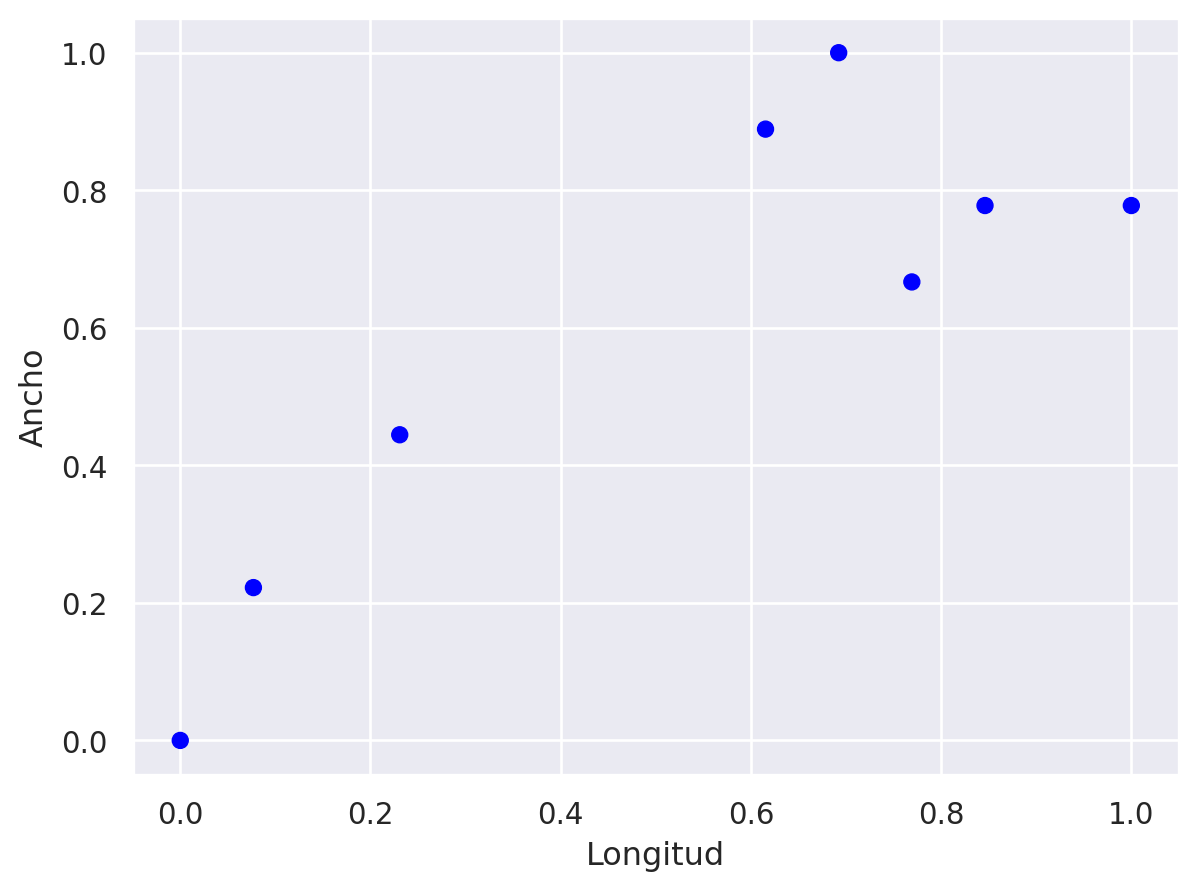

In [15]:
# Graficamos
(
    so.Plot(data = df, x = "Longitud", y = "Ancho")
    .add(so.Text(valign = "bottom"))
    .add(so.Dot(color = "blue"), data = df, x = "Longitud", y = "Ancho")
)

In [10]:
df.corr()

,Longitud,Ancho
Longitud,1.000000,0.858572
Ancho,0.858572,1.000000


### b) Calcular la matriz de covarianzas y hallar sus autovalores y autovectores

In [23]:
df_star = df - df.mean()

Sigma = (df_star.transpose() @ df_star) / len(df_star)

In [24]:
# Matriz de covarianza
np.cov(df.transpose(), bias = 1)

array([[0.12342825, 0.09762286],
       [0.09762286, 0.10474537]])

In [30]:
# Autovalores , Autovectores
gamma, U = np.linalg.eigh(Sigma)   # eigh es un comando especial para matrices simétricas
print("avals: \n", gamma, "\n")
print("avecs: \n",U)

avals: 
 [0.01601803 0.21215559] 

avecs: 
 [[ 0.6725868  -0.74001824]
 [-0.74001824 -0.6725868 ]]


### c) Hallar las componentes principales

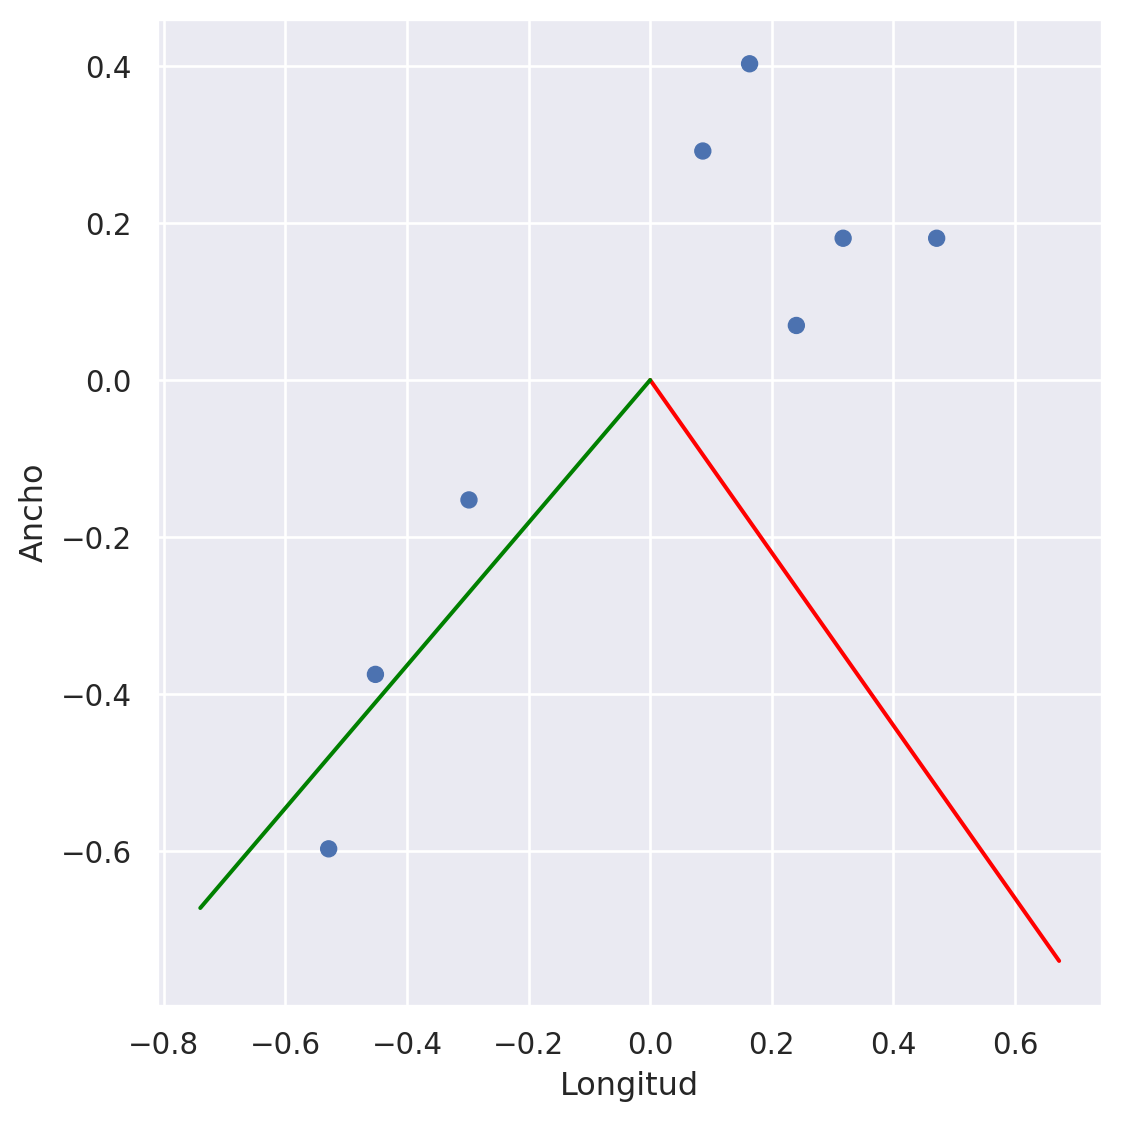

In [32]:
(
    so.Plot()
    .add(so.Dot(), x = df_star["Longitud"], y = df_star["Ancho"])
    .add(so.Line(color = "red"), x = [0,U[0,0]], y = [0,U[1,0]])
    .add(so.Line(color = "green"), x = [0,U[0,1]], y = [0,U[1,1]])
    .layout(size = (6, 6))
)

# Verde: 1er componente ppal
# Rojo: 2do componente ppal

In [103]:
# U son las direcciones del nuevo espacio
# Calculamos las componentes principales usando la formula
# Z = (df - df_raya) * U = df_star * U


Z = df_star @ U 
Z.columns = ["Z" + str(i + 1) for i in Z.columns]
Z

,Z1,Z2
0,0.793040,0.086260
1,0.586651,-0.026451
2,0.323339,-0.087424
3,-0.260211,-0.157634
4,-0.391868,-0.188121
5,-0.224596,0.110289
6,-0.356253,0.079803
7,-0.470102,0.183277


Estos son los componentes principales

---

### d) Decidir si la información está mayormente representada en una de estas dos componentes

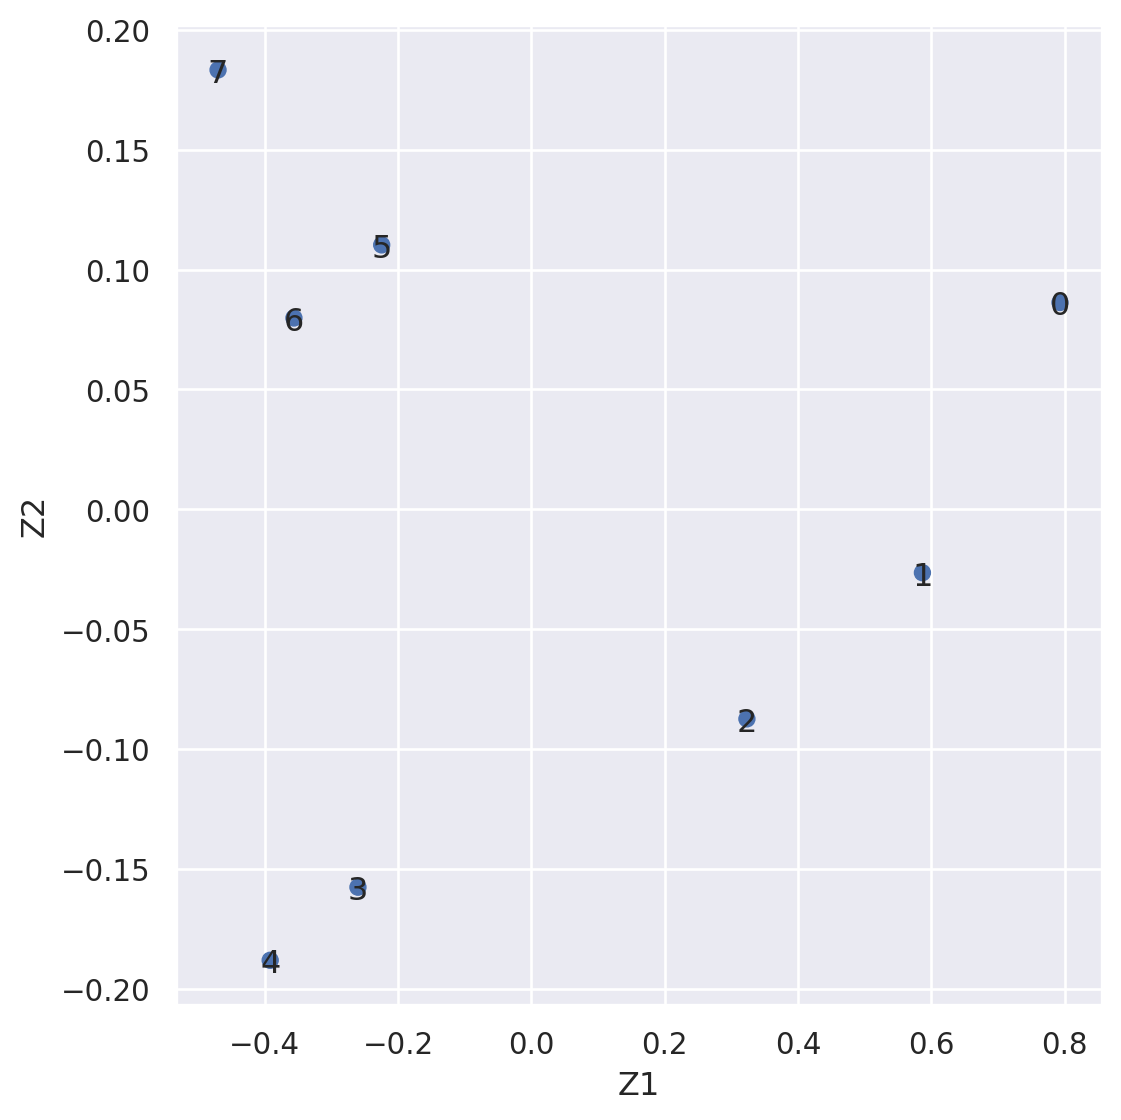

In [102]:
# Graficamos
(
    so.Plot(data = Z, x = "Z1", y = "Z2", text = df.index)
    .add(so.Dot())
    .add(so.Text())    
    .layout(size=(6,6))
)

In [105]:
# Repetimos todo lo mismo usando los comandos de Python

pca = PCA(n_components=2)

# principalComponents devuelve X_star * U
principalComponents = pca.fit_transform(df_star)
print(principalComponents)

[[-0.79303958 -0.08626039]
 [-0.58665137  0.02645066]
 [-0.32333868  0.08742426]
 [ 0.26021119  0.15763403]
 [ 0.39186754  0.18812083]
 [ 0.22459642 -0.11028936]
 [ 0.35625276 -0.07980256]
 [ 0.47010172 -0.18327746]]


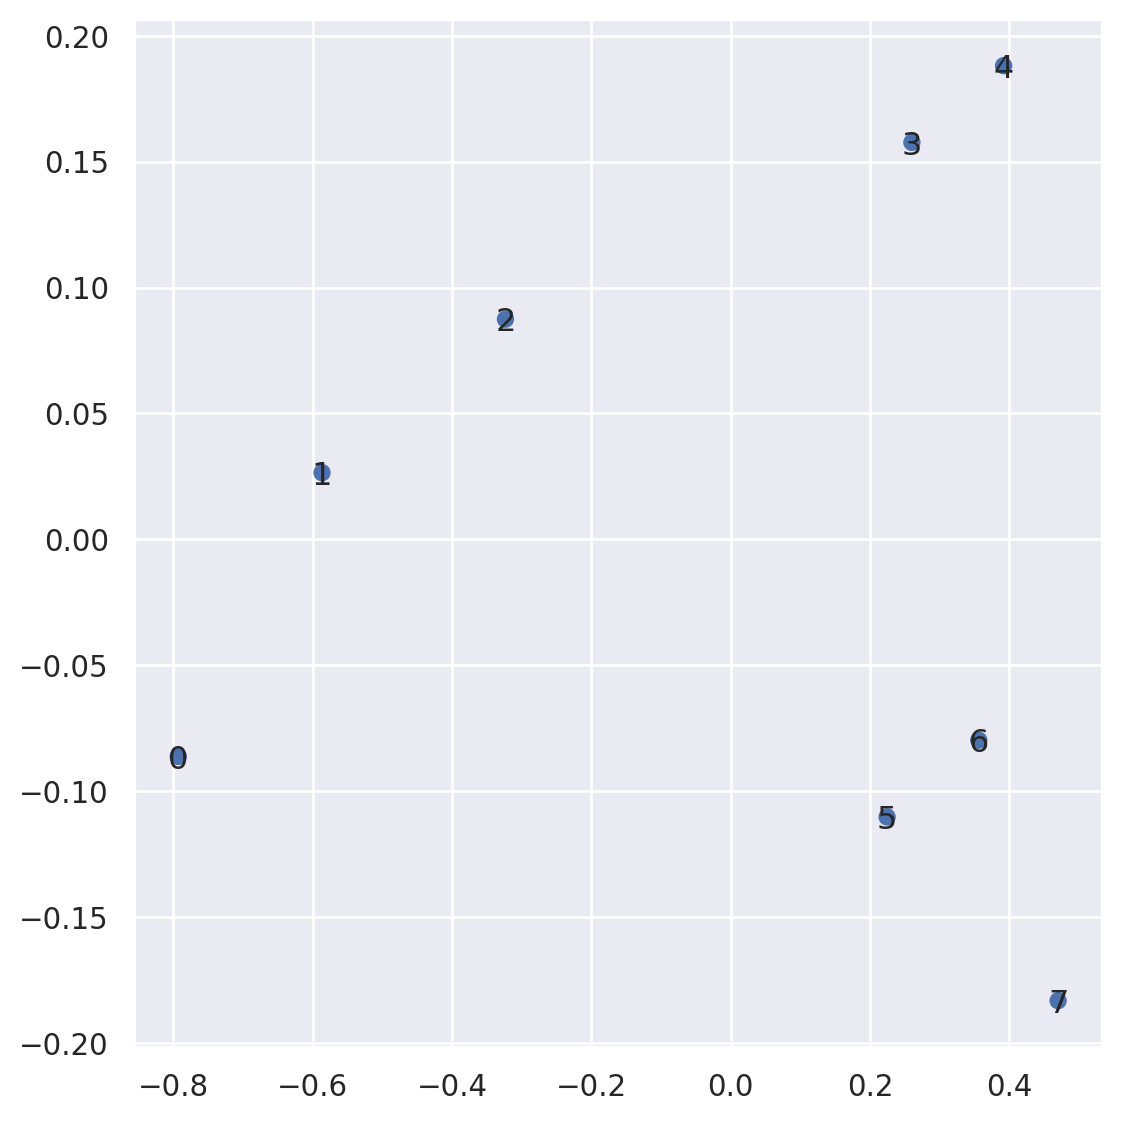

In [107]:
# Graficamos
(
    so.Plot(x = principalComponents[:,0], y = principalComponents[:,1], text = df.index)
    .add(so.Dot())
    .add(so.Text())
    .layout(size=(6,6))
)

Confio mas en esta representacion ya que usamos directamente la funcion pca, y no la armamos de 0 a mano.

In [111]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_

array([[ 0.74001824,  0.6725868 ],
       [-0.6725868 ,  0.74001824]])

La informacion esta igualmente representada en las 2 componentes

---

### e) Indicar la proporción de la variabilidad explicada por cada una de ellas. ¿A que conclusión puede llegar?

In [124]:
print(Sigma, " \n")

# autovalores ordenados de mayor a menor
av = np.flip(U)
print("Autovalores: ", av, " \n")

print("Varianza explicada por la primera componente:  \n", av[0] / sum(av))
print("Varianza explicada por la segunda componente:  \n", av[1] / sum(av))

          Longitud     Ancho
Longitud  0.123428  0.097623
Ancho     0.097623  0.104745  

Autovalores:  [[-0.74001824 -0.6725868 ]
 [ 0.6725868  -0.74001824]]  

Varianza explicada por la primera componente:  
 [10.97438096  0.47613224]
Varianza explicada por la segunda componente:  
 [-9.97438096  0.52386776]


Llegamos entonces a que los autovalores tienen el mismo peso, y tambien la varianza explicada en la componente 1 es casi identica a la de la componente 2 solo que con un -9.97 en vez de un 10. 
No se is influye.

## Ej 2) Sea A la matriz de covarianzas de una cierta muestra de datos cuya media es cero.

$$
A = \left(
   \begin{array}{cccc}
    3 & 1 & 1 \\
    1 & 3 & 1\\
    1 & 1 & 5\\
   \end{array}
   \right)
$$

### a) Hallar los autovalores y autovectores de la matriz de covarianzas.

In [127]:
a = np.matrix([[3, 1, 1], [1, 3, 1], [1, 1, 5]])

matrix([[3, 1, 1],
        [1, 3, 1],
        [1, 1, 5]])

In [129]:
# Matriz de covarianza
a_cov = np.cov(a.transpose(), bias = 1)
a_cov

array([[ 0.88888889, -0.44444444, -0.88888889],
       [-0.44444444,  0.88888889, -0.88888889],
       [-0.88888889, -0.88888889,  3.55555556]])

In [130]:
# Autovalores , Autovectores
gamma, U = np.linalg.eigh(a_cov)   # eigh es un comando especial para matrices simétricas
print("avals: \n", gamma, "\n")
print("avecs: \n",U)

avals: 
 [7.04149081e-18 1.33333333e+00 4.00000000e+00] 

avecs: 
 [[ 6.66666667e-01 -7.07106781e-01 -2.35702260e-01]
 [ 6.66666667e-01  7.07106781e-01 -2.35702260e-01]
 [ 3.33333333e-01 -1.11022302e-16  9.42809042e-01]]


### b) Dar la expresión de las componentes principales z1, z2, z3 e indicar la proporción de la variabilidad explicada por cada una de ellas

In [132]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(a_cov)
print(principalComponents)

[[-1.57134840e+00  9.42809042e-01 -8.45934412e-17]
 [-1.57134840e+00 -9.42809042e-01 -8.45934412e-17]
 [ 3.14269681e+00  2.96059473e-16 -8.45934412e-17]]


In [133]:
Z = a_cov @ U 
Z.columns = ["Z" + str(i + 1) for i in Z.columns]
Z

AttributeError: 'numpy.ndarray' object has no attribute 'columns'